Columns in the dataset: Index(['DATE', 'IPG2211A2N'], dtype='object')


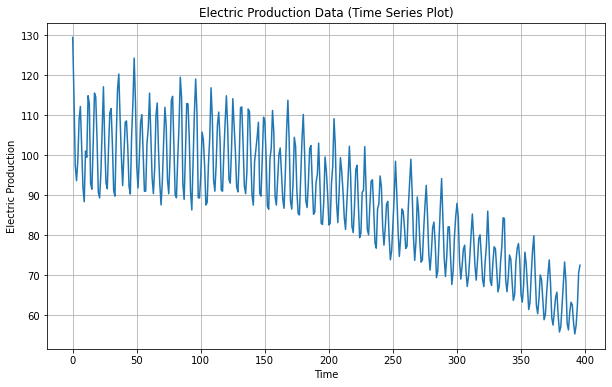

ADF Test Results:
ADF Statistic: 1.689482064040665
p-value: 0.9981026718756796
Critical Values: {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}
The series is likely non-stationary (p-value > 0.05).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = r'Electric_Production.csv'
data = pd.read_csv(file_path)

# Check the columns to see what data is available
print("Columns in the dataset:", data.columns)

# Ensure there are no leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Check if 'IPG2211A2N' column exists
if 'IPG2211A2N' not in data.columns:
    raise KeyError("'IPG2211A2N' column not found in the dataset. Please check the column name.")

# Access the 'IPG2211A2N' column
production_data = data['IPG2211A2N']

# Reverse the order of the data to maintain chronological order
production_data_reverse = production_data.iloc[::-1]

# Reset index to maintain the correct time series order
production_data_reverse.reset_index(drop=True, inplace=True)

# Handle Missing Values
data['IPG2211A2N'].fillna(data['IPG2211A2N'].mean(), inplace=True)

# Handle Outliers using IQR for 'IPG2211A2N' column
Q1 = data['IPG2211A2N'].quantile(0.25)
Q3 = data['IPG2211A2N'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers based on the IQR bounds
data = data[(data['IPG2211A2N'] >= lower_bound) & (data['IPG2211A2N'] <= upper_bound)]

# Plot the Time Series to visually inspect
plt.figure(figsize=(10, 6))
plt.plot(production_data_reverse)
plt.title('Electric Production Data (Time Series Plot)')
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.grid(True)
plt.show()

# Perform Augmented Dickey-Fuller (ADF) Test for Stationarity
result = adfuller(production_data_reverse)

# Extract and print the ADF test results
print("ADF Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")

# Interpretation of the ADF test
if result[1] <= 0.05:
    print("The series is likely stationary (p-value <= 0.05).")
else:
    print("The series is likely non-stationary (p-value > 0.05).")
